In [1]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from webdriver_manager.chrome import ChromeDriverManager
from selenium.common.exceptions import StaleElementReferenceException
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.common.by import By
from selenium.webdriver.support import expected_conditions as EC
import time

In [2]:
import requests
from bs4 import BeautifulSoup  
import pandas as pd
import time
import re
import urllib

In [3]:
import googletrans
from googletrans import *
translator = googletrans.Translator()
def translating_to_english(r):
    translation = r.apply(translator.translate, src='auto', dest='en').apply(getattr, args=('text',))
    return translation

In [4]:
def web_scrap(current_url):
    browser = webdriver.Chrome(service=Service(ChromeDriverManager().install()))
    browser.get(current_url)
    username=browser.find_elements(By.XPATH,"//span[contains(@class,'a-profile-name')]")
    usernames=[]
    for user in range(len(username)):
        usernames.append((username[user].text).strip())
    usernames=usernames[2:]
    
    
    review = browser.find_elements(By.XPATH,"//span[@class='a-size-base review-text review-text-content']")
    reviews=[]
    for r in range(len(review)):
        reviews.append((review[r].text).strip())

    star = browser.find_elements(By.XPATH,'//span[@class="a-icon-alt"]')
    st=[]
    for value in star:
        rating = value.get_attribute('textContent')    
        st.append(rating)
    st=st[3:]

    date= browser.find_elements(By.XPATH,'//span[@class="a-size-base a-color-secondary review-date"]')
    dates=[]
    for d in range(len(date)):
        dates.append((date[d].text).strip())
    #print(dates)
    dates=dates[2:]
    
    final=pd.DataFrame(list(zip(usernames,reviews,st,dates)),columns=['Reviewer','Review','Stars','Dates'])
    return final


In [5]:
browser = webdriver.Chrome(service=Service(ChromeDriverManager().install()))
url='https://www.amazon.com/Newest-HP-Pavilion-7-5700U-i7-1180G7/product-reviews/B09QS7W8G5/ref=cm_cr_getr_d_paging_btm_next_1?ie=UTF8&reviewerType=all_reviews&pageNumber=1'
browser.get(url)
df=web_scrap(url)
new_df=df
for i in range(2,5):
    url='https://www.amazon.com/Newest-HP-Pavilion-7-5700U-i7-1180G7/product-reviews/B09QS7W8G5/ref=cm_cr_getr_d_paging_btm_next_'+str(i)+'?ie=UTF8&reviewerType=all_reviews&pageNumber='+str(i)
    df=web_scrap(url)
    new_df=new_df.append(df,ignore_index=True)
new_df['Product_Name']='2022 Newest HP Pavilion 15.6" FHD 1080P IPS Laptop, 8-Core AMD Ryzen 7-5700U'

    
    

In [6]:
new_df

,Reviewer,Review,Stars,Dates,Product_Name
0,jackhandy,i do audio work for video games: creating sfx ...,5.0 out of 5 stars,"Reviewed in the United States on September 24,...","2022 Newest HP Pavilion 15.6"" FHD 1080P IPS La..."
1,Trayson Lancaster,"I've had this laptop for a week now, which has...",3.0 out of 5 stars,"Reviewed in the United States on November 4, 2022","2022 Newest HP Pavilion 15.6"" FHD 1080P IPS La..."
2,Puck,This is by far the fastest laptop I have ever ...,5.0 out of 5 stars,"Reviewed in the United States on September 24,...","2022 Newest HP Pavilion 15.6"" FHD 1080P IPS La..."
3,Ovie Joshua,My wife loves it.,5.0 out of 5 stars,"Reviewed in the United States on October 28, 2022","2022 Newest HP Pavilion 15.6"" FHD 1080P IPS La..."
4,Ricardo Y Cabral Lopes Dias,It worth,4.0 out of 5 stars,"Reviewed in the United States on October 3, 2022","2022 Newest HP Pavilion 15.6"" FHD 1080P IPS La..."
5,Anna,"Everything is great, only the color of the key...",5.0 out of 5 stars,"Reviewed in the United States on September 23,...","2022 Newest HP Pavilion 15.6"" FHD 1080P IPS La..."
6,John A. Chemycz,The Ryzen chip is very fast and there is no la...,4.0 out of 5 stars,"Reviewed in the United States on April 6, 2022","2022 Newest HP Pavilion 15.6"" FHD 1080P IPS La..."
7,Dmitry Garanin,"I bought this laptop for scientific computing,...",4.0 out of 5 stars,"Reviewed in the United States on February 9, 2022","2022 Newest HP Pavilion 15.6"" FHD 1080P IPS La..."
8,Karen S. Cole,I like this HP Pavilion. I've owned several HP...,5.0 out of 5 stars,"Reviewed in the United States on June 18, 2022","2022 Newest HP Pavilion 15.6"" FHD 1080P IPS La..."
9,AndyG,I've had this computer for a couple of weeks n...,5.0 out of 5 stars,"Reviewed in the United States on June 20, 2022","2022 Newest HP Pavilion 15.6"" FHD 1080P IPS La..."


In [7]:
for i in range(1,10):
    url='https://www.amazon.com/HP-14-Laptop-Dual-Core-Processor/product-reviews/B09VRX9YVW/ref=cm_cr_arp_d_paging_btm_next_'+str(i)+'?ie=UTF8&reviewerType=all_reviews&pageNumber='+str(i)
    df1=web_scrap(url)
    new_df=new_df.append(df1,ignore_index=True)
    #new_df['Product_Name']='Newest HP 14" HD Laptop, Windows 11, Intel Celeron Dual-Core Processor Up to 2.60GHz, 4GB RAM, 64GB SSD'

In [8]:
new_df['Product_Name']=new_df['Product_Name'].fillna(value='Newest HP 14" HD Laptop, Windows 11, Intel Celeron Dual-Core Processor Up to 2.60GHz, 4GB RAM, 64GB SSD')

In [9]:
new_df

,Reviewer,Review,Stars,Dates,Product_Name
0,jackhandy,i do audio work for video games: creating sfx ...,5.0 out of 5 stars,"Reviewed in the United States on September 24,...","2022 Newest HP Pavilion 15.6"" FHD 1080P IPS La..."
1,Trayson Lancaster,"I've had this laptop for a week now, which has...",3.0 out of 5 stars,"Reviewed in the United States on November 4, 2022","2022 Newest HP Pavilion 15.6"" FHD 1080P IPS La..."
2,Puck,This is by far the fastest laptop I have ever ...,5.0 out of 5 stars,"Reviewed in the United States on September 24,...","2022 Newest HP Pavilion 15.6"" FHD 1080P IPS La..."
3,Ovie Joshua,My wife loves it.,5.0 out of 5 stars,"Reviewed in the United States on October 28, 2022","2022 Newest HP Pavilion 15.6"" FHD 1080P IPS La..."
4,Ricardo Y Cabral Lopes Dias,It worth,4.0 out of 5 stars,"Reviewed in the United States on October 3, 2022","2022 Newest HP Pavilion 15.6"" FHD 1080P IPS La..."
...,...,...,...,...,...
75,Linda B,"Great computer. 3 USB ports, 1 HDMI, extra sto...",5.0 out of 5 stars,"Reviewed in the United States on July 28, 2022","Newest HP 14"" HD Laptop, Windows 11, Intel Cel..."
76,ariyah mae,I love it. It came fast and very easy access t...,5.0 out of 5 stars,"Reviewed in the United States on August 18, 2022","Newest HP 14"" HD Laptop, Windows 11, Intel Cel..."
77,Amazon Customer,This was a great buy. It’s a keeper for sure. ...,5.0 out of 5 stars,"Reviewed in the United States 🇺🇸 on August 18,...","Newest HP 14"" HD Laptop, Windows 11, Intel Cel..."
78,Ejworx,Great product.\nThanks,5.0 out of 5 stars,"Reviewed in the United States 🇺🇸 on July 31, 2022","Newest HP 14"" HD Laptop, Windows 11, Intel Cel..."


In [10]:
url='https://www.amazon.com/HP-Pavilion-Micro-EDGE-Processor-15-dk0020nr/product-reviews/B07SC6HG74/ref=cm_cr_arp_d_paging_btm_next_1?ie=UTF8&reviewerType=all_reviews&pageNumber=1'
browser = webdriver.Chrome(service=Service(ChromeDriverManager().install()))
browser.get(url)
time.sleep(4)
df2=web_scrap(url)
new_df=new_df.append(df2,ignore_index=True)
for i in range(2,10):
    url='https://www.amazon.com/HP-Pavilion-Micro-EDGE-Processor-15-dk0020nr/product-reviews/B09VRX9YVW/ref=cm_cr_arp_d_paging_btm_next_'+str(i)+'?ie=UTF8&reviewerType=all_reviews&pageNumber='+str(i)
    df2=web_scrap(url)
    new_df=new_df.append(df2,ignore_index=True)
new_df['Product_Name']=new_df['Product_Name'].fillna(value='HP-Pavilion-Micro-EDGE-Processor-15')

[WDM] - Downloading: 100%|████████████████████████████████████████████████████████| 6.46M/6.46M [00:20<00:00, 4.28MB/s]

In [11]:
new_df['Product_Name'].value_counts()

HP-Pavilion-Micro-EDGE-Processor-15                                                                        70
Newest HP 14" HD Laptop, Windows 11, Intel Celeron Dual-Core Processor Up to 2.60GHz, 4GB RAM, 64GB SSD    43
2022 Newest HP Pavilion 15.6" FHD 1080P IPS Laptop, 8-Core AMD Ryzen 7-5700U                               37
Name: Product_Name, dtype: int64

In [12]:
new_df=new_df.drop_duplicates(ignore_index=True)

In [13]:
for i in range(1,22):
    url='https://www.amazon.com/HP-Chromebook-11-inch-Laptop-11a-na0010nr/product-reviews/B08HJT1BKQ/ref=cm_cr_arp_d_paging_btm_next_'+str(i)+'?ie=UTF8&reviewerType=all_reviews&pageNumber='+str(i)
    df3=web_scrap(url)
    new_df=new_df.append(df3,ignore_index=True)
new_df['Product_Name']=new_df['Product_Name'].fillna(value='HP-Chromebook-11-inch-Laptop')

In [14]:
for i in range(1,15):
    url='https://www.amazon.com/Newest-HP-R5-5500U-Microphone-Windows/product-reviews/B09VRX9YVW/ref=cm_cr_arp_d_paging_btm_next_'+str(i)+'?ie=UTF8&reviewerType=all_reviews&pageNumber='+str(i)
    df4=web_scrap(url)
    new_df=new_df.append(df4,ignore_index=True)
new_df['Product_Name']=new_df['Product_Name'].fillna(value='Newest-HP-R5-5500U-Microphone-Windows')

In [15]:
new_df['Product_Name'].value_counts()

HP-Chromebook-11-inch-Laptop                                                                               183
Newest-HP-R5-5500U-Microphone-Windows                                                                       83
HP-Pavilion-Micro-EDGE-Processor-15                                                                         70
Newest HP 14" HD Laptop, Windows 11, Intel Celeron Dual-Core Processor Up to 2.60GHz, 4GB RAM, 64GB SSD     43
2022 Newest HP Pavilion 15.6" FHD 1080P IPS Laptop, 8-Core AMD Ryzen 7-5700U                                37
Name: Product_Name, dtype: int64

In [16]:
new_df

,Reviewer,Review,Stars,Dates,Product_Name
0,jackhandy,i do audio work for video games: creating sfx ...,5.0 out of 5 stars,"Reviewed in the United States on September 24,...","2022 Newest HP Pavilion 15.6"" FHD 1080P IPS La..."
1,Trayson Lancaster,"I've had this laptop for a week now, which has...",3.0 out of 5 stars,"Reviewed in the United States on November 4, 2022","2022 Newest HP Pavilion 15.6"" FHD 1080P IPS La..."
2,Puck,This is by far the fastest laptop I have ever ...,5.0 out of 5 stars,"Reviewed in the United States on September 24,...","2022 Newest HP Pavilion 15.6"" FHD 1080P IPS La..."
3,Ovie Joshua,My wife loves it.,5.0 out of 5 stars,"Reviewed in the United States on October 28, 2022","2022 Newest HP Pavilion 15.6"" FHD 1080P IPS La..."
4,Ricardo Y Cabral Lopes Dias,It worth,4.0 out of 5 stars,"Reviewed in the United States on October 3, 2022","2022 Newest HP Pavilion 15.6"" FHD 1080P IPS La..."
...,...,...,...,...,...
411,Linda B,"Great computer. 3 USB ports, 1 HDMI, extra sto...",5.0 out of 5 stars,"Reviewed in the United States on July 28, 2022",Newest-HP-R5-5500U-Microphone-Windows
412,ariyah mae,I love it. It came fast and very easy access t...,5.0 out of 5 stars,"Reviewed in the United States on August 18, 2022",Newest-HP-R5-5500U-Microphone-Windows
413,Amazon Customer,This was a great buy. It’s a keeper for sure. ...,5.0 out of 5 stars,"Reviewed in the United States 🇺🇸 on August 18,...",Newest-HP-R5-5500U-Microphone-Windows
414,Ejworx,Great product.\nThanks,5.0 out of 5 stars,"Reviewed in the United States 🇺🇸 on July 31, 2022",Newest-HP-R5-5500U-Microphone-Windows


In [18]:
for i in range(1,14):
    url='https://www.amazon.com/HP-Portable-Micro-Edge-Anti-Glare-14-fq1025nr/product-reviews/B09G8SK2KK/ref=cm_cr_arp_d_paging_btm_next_'+str(i)+'?ie=UTF8&reviewerType=all_reviews&pageNumber='+str(i)
    df5=web_scrap(url)
    new_df=new_df.append(df5,ignore_index=True)
new_df['Product_Name']=new_df['Product_Name'].fillna(value='HP-Portable-Micro-Edge-Anti-Glare-14')

[WDM] - Downloading: 100%|████████████████████████████████████████████████████████| 6.46M/6.46M [20:25<00:00, 5.53kB/s]


,Reviewer,Review,Stars,Dates,Product_Name
0,jackhandy,i do audio work for video games: creating sfx ...,5.0 out of 5 stars,"Reviewed in the United States on September 24,...","2022 Newest HP Pavilion 15.6"" FHD 1080P IPS La..."
1,Trayson Lancaster,"I've had this laptop for a week now, which has...",3.0 out of 5 stars,"Reviewed in the United States on November 4, 2022","2022 Newest HP Pavilion 15.6"" FHD 1080P IPS La..."
2,Puck,This is by far the fastest laptop I have ever ...,5.0 out of 5 stars,"Reviewed in the United States on September 24,...","2022 Newest HP Pavilion 15.6"" FHD 1080P IPS La..."
3,Ovie Joshua,My wife loves it.,5.0 out of 5 stars,"Reviewed in the United States on October 28, 2022","2022 Newest HP Pavilion 15.6"" FHD 1080P IPS La..."
4,Ricardo Y Cabral Lopes Dias,It worth,4.0 out of 5 stars,"Reviewed in the United States on October 3, 2022","2022 Newest HP Pavilion 15.6"" FHD 1080P IPS La..."
...,...,...,...,...,...
538,Kidus Tsige,After seeing so many rough reviews I was a bit...,5.0 out of 5 stars,"Reviewed in the United States 🇺🇸 on May 7, 2022",HP-Portable-Micro-Edge-Anti-Glare-14
539,Raymundo,"It is a very good quality-price option, with r...",5.0 out of 5 stars,"Reviewed in Mexico 🇲🇽 on March 25, 2022",HP-Portable-Micro-Edge-Anti-Glare-14
540,LAISA,"It is exactly as described, very fast, very li...",5.0 out of 5 stars,"Reviewed in Mexico 🇲🇽 on March 4, 2022",HP-Portable-Micro-Edge-Anti-Glare-14
541,Hector E.,I can't activate dual channel to ram when putt...,4.0 out of 5 stars,"Reviewed in Mexico 🇲🇽 on May 22, 2022",HP-Portable-Micro-Edge-Anti-Glare-14


In [24]:
for i in range(1,37):
    url='https://www.amazon.com/HP-Generation-i5-1135G7-Graphics-15-dy2024nr/product-reviews/B09FXFDGN3/ref=cm_cr_arp_d_paging_btm_next_'+str(i)+'?ie=UTF8&reviewerType=all_reviews&pageNumber='+str(i)
    df6=web_scrap(url)
    new_df=new_df.append(df6,ignore_index=True)
new_df['Product_Name']=new_df['Product_Name'].fillna(value='HP-Generation-i5-1135G7-Graphics-15')

In [25]:
new_df

,Reviewer,Review,Stars,Dates,Product_Name
0,jackhandy,i do audio work for video games: creating sfx ...,5.0 out of 5 stars,"Reviewed in the United States on September 24,...","2022 Newest HP Pavilion 15.6"" FHD 1080P IPS La..."
1,Trayson Lancaster,"I've had this laptop for a week now, which has...",3.0 out of 5 stars,"Reviewed in the United States on November 4, 2022","2022 Newest HP Pavilion 15.6"" FHD 1080P IPS La..."
2,Puck,This is by far the fastest laptop I have ever ...,5.0 out of 5 stars,"Reviewed in the United States on September 24,...","2022 Newest HP Pavilion 15.6"" FHD 1080P IPS La..."
3,Ovie Joshua,My wife loves it.,5.0 out of 5 stars,"Reviewed in the United States on October 28, 2022","2022 Newest HP Pavilion 15.6"" FHD 1080P IPS La..."
4,Ricardo Y Cabral Lopes Dias,It worth,4.0 out of 5 stars,"Reviewed in the United States on October 3, 2022","2022 Newest HP Pavilion 15.6"" FHD 1080P IPS La..."
...,...,...,...,...,...
734,shop22,This is a great laptop! I love it!!,5.0 out of 5 stars,"Reviewed in the United States 🇺🇸 on March 21, ...",HP-Generation-i5-1135G7-Graphics-15
735,Peonygarden,"After 2, 3 days trading with amazon.com, it's ...",5.0 out of 5 stars,Reviewed in the United States 🇺🇸 on January 14...,HP-Generation-i5-1135G7-Graphics-15
736,Frank,Great laptop for price,5.0 out of 5 stars,"Reviewed in the United States 🇺🇸 on January 2,...",HP-Generation-i5-1135G7-Graphics-15
737,Carlos Carbajal,Ami hijo le encanta mucho para sus video juegos,5.0 out of 5 stars,Reviewed in the United States 🇺🇸 on January 26...,HP-Generation-i5-1135G7-Graphics-15


,Reviewer,Review,Stars,Dates,Product_Name
0,jackhandy,i do audio work for video games: creating sfx ...,5.0 out of 5 stars,"Reviewed in the United States on September 24,...","2022 Newest HP Pavilion 15.6"" FHD 1080P IPS La..."
1,Trayson Lancaster,"I've had this laptop for a week now, which has...",3.0 out of 5 stars,"Reviewed in the United States on November 4, 2022","2022 Newest HP Pavilion 15.6"" FHD 1080P IPS La..."
2,Puck,This is by far the fastest laptop I have ever ...,5.0 out of 5 stars,"Reviewed in the United States on September 24,...","2022 Newest HP Pavilion 15.6"" FHD 1080P IPS La..."
3,Ovie Joshua,My wife loves it.,5.0 out of 5 stars,"Reviewed in the United States on October 28, 2022","2022 Newest HP Pavilion 15.6"" FHD 1080P IPS La..."
4,Ricardo Y Cabral Lopes Dias,It worth,4.0 out of 5 stars,"Reviewed in the United States on October 3, 2022","2022 Newest HP Pavilion 15.6"" FHD 1080P IPS La..."
...,...,...,...,...,...
734,shop22,This is a great laptop! I love it!!,5.0 out of 5 stars,"Reviewed in the United States 🇺🇸 on March 21, ...",HP-Generation-i5-1135G7-Graphics-15
735,Peonygarden,"After 2, 3 days trading with amazon.com, it's ...",5.0 out of 5 stars,Reviewed in the United States 🇺🇸 on January 14...,HP-Generation-i5-1135G7-Graphics-15
736,Frank,Great laptop for price,5.0 out of 5 stars,"Reviewed in the United States 🇺🇸 on January 2,...",HP-Generation-i5-1135G7-Graphics-15
737,Carlos Carbajal,My son loves it a lot for his video games,5.0 out of 5 stars,Reviewed in the United States 🇺🇸 on January 26...,HP-Generation-i5-1135G7-Graphics-15


In [41]:
new_df['Product_Name'].value_counts()

HP-Generation-i5-1135G7-Graphics-15                                                                        196
HP-Chromebook-11-inch-Laptop                                                                               183
HP-Portable-Micro-Edge-Anti-Glare-14                                                                       127
HP-Generation-i5-1135G7-Graphics-17                                                                         91
Newest-HP-R5-5500U-Microphone-Windows                                                                       83
HP-Pavilion-Micro-EDGE-Processor-15                                                                         70
Newest HP 14" HD Laptop, Windows 11, Intel Celeron Dual-Core Processor Up to 2.60GHz, 4GB RAM, 64GB SSD     43
HP-Generation-Graphics-Bluetooth-17                                                                         42
2022 Newest HP Pavilion 15.6" FHD 1080P IPS Laptop, 8-Core AMD Ryzen 7-5700U                                37
N

In [39]:
for i in range(1,11):
    url='https://www.amazon.com/HP-Generation-i5-1135G7-Graphics-17-cn0025nr/product-reviews/B09FXLRBFQ/ref=cm_cr_arp_d_paging_btm_next_'+str(i)+'?ie=UTF8&reviewerType=all_reviews&pageNumber='+str(i) 
    df7=web_scrap(url)
    new_df=new_df.append(df7,ignore_index=True)
new_df['Product_Name']=new_df['Product_Name'].fillna(value='HP-Generation-i5-1135G7-Graphics-17')


In [35]:
for i in range(1,9):
    url='https://www.amazon.com/HP-Generation-Graphics-Bluetooth-17-by4025nr/product-reviews/B09TG4XXYD/ref=cm_cr_arp_d_paging_btm_next_'+str(i)+'?ie=UTF8&reviewerType=all_reviews&pageNumber='+str(i)
    df7=web_scrap(url)
    new_df=new_df.append(df7,ignore_index=True)
new_df['Product_Name']=new_df['Product_Name'].fillna(value='HP-Generation-Graphics-Bluetooth-17')


In [40]:
new_df

,Reviewer,Review,Stars,Dates,Product_Name
0,jackhandy,i do audio work for video games: creating sfx ...,5.0 out of 5 stars,"Reviewed in the United States on September 24,...","2022 Newest HP Pavilion 15.6"" FHD 1080P IPS La..."
1,Trayson Lancaster,"I've had this laptop for a week now, which has...",3.0 out of 5 stars,"Reviewed in the United States on November 4, 2022","2022 Newest HP Pavilion 15.6"" FHD 1080P IPS La..."
2,Puck,This is by far the fastest laptop I have ever ...,5.0 out of 5 stars,"Reviewed in the United States on September 24,...","2022 Newest HP Pavilion 15.6"" FHD 1080P IPS La..."
3,Ovie Joshua,My wife loves it.,5.0 out of 5 stars,"Reviewed in the United States on October 28, 2022","2022 Newest HP Pavilion 15.6"" FHD 1080P IPS La..."
4,Ricardo Y Cabral Lopes Dias,It worth,4.0 out of 5 stars,"Reviewed in the United States on October 3, 2022","2022 Newest HP Pavilion 15.6"" FHD 1080P IPS La..."
...,...,...,...,...,...
867,Donald Field,Would buy again.,5.0 out of 5 stars,"Reviewed in the United States 🇺🇸 on May 10, 2022",HP-Generation-i5-1135G7-Graphics-17
868,Alfonso Davis,Nice laptop for school. Easy to use. Very fast...,5.0 out of 5 stars,"Reviewed in the United States 🇺🇸 on June 4, 2022",HP-Generation-i5-1135G7-Graphics-17
869,Charity C,I was thrilled to find this computer for our h...,5.0 out of 5 stars,Reviewed in the United States 🇺🇸 on December 1...,HP-Generation-i5-1135G7-Graphics-17
870,Thomas DeMarco,"There was No finger print reader, and it is NO...",5.0 out of 5 stars,"Reviewed in the United States 🇺🇸 on January 5,...",HP-Generation-i5-1135G7-Graphics-17


In [46]:
for i in range(1,33):
    url='https://www.amazon.com/Flagship-HP-Chromebook-Anti-Glare-Processor/product-reviews/B08PDTLK1Q/ref=cm_cr_arp_d_paging_btm_next_'+str(i)+'?ie=UTF8&reviewerType=all_reviews&pageNumber='+str(i)
    df8=web_scrap(url)
    new_df=new_df.append(df8,ignore_index=True)
new_df['Product_Name']=new_df['Product_Name'].fillna(value='HP-Chromebook-Anti-Glare-Processor')


In [47]:
new_df

,Reviewer,Review,Stars,Dates,Product_Name
0,jackhandy,i do audio work for video games: creating sfx ...,5.0 out of 5 stars,"Reviewed in the United States on September 24,...","2022 Newest HP Pavilion 15.6"" FHD 1080P IPS La..."
1,Trayson Lancaster,"I've had this laptop for a week now, which has...",3.0 out of 5 stars,"Reviewed in the United States on November 4, 2022","2022 Newest HP Pavilion 15.6"" FHD 1080P IPS La..."
2,Puck,This is by far the fastest laptop I have ever ...,5.0 out of 5 stars,"Reviewed in the United States on September 24,...","2022 Newest HP Pavilion 15.6"" FHD 1080P IPS La..."
3,Ovie Joshua,My wife loves it.,5.0 out of 5 stars,"Reviewed in the United States on October 28, 2022","2022 Newest HP Pavilion 15.6"" FHD 1080P IPS La..."
4,Ricardo Y Cabral Lopes Dias,It worth,4.0 out of 5 stars,"Reviewed in the United States on October 3, 2022","2022 Newest HP Pavilion 15.6"" FHD 1080P IPS La..."
...,...,...,...,...,...
1157,Enrique Valencia,Una muy buena computadora por un precio muy ac...,5.0 out of 5 stars,"Reviewed in Mexico 🇲🇽 on June 27, 2021",HP-Chromebook-Anti-Glare-Processor
1158,María de Lourdes Mejía Camal,Me encantó,5.0 out of 5 stars,"Reviewed in Mexico 🇲🇽 on August 10, 2021",HP-Chromebook-Anti-Glare-Processor
1159,Vanessa Alexia Briones,"Excelente producto, buena calidad, buen precio",5.0 out of 5 stars,"Reviewed in Mexico 🇲🇽 on September 3, 2021",HP-Chromebook-Anti-Glare-Processor
1160,Sthefany,Me encantó el color y la relación calidad-precio,5.0 out of 5 stars,"Reviewed in Mexico 🇲🇽 on June 14, 2021",HP-Chromebook-Anti-Glare-Processor


In [209]:
new_df

,Reviewer,Review,Product_Name,Reviewed_at,Date_of_Review,Stars_out_of_5,Polarity
0,jackhandy,i do audio work for video games: creating sfx ...,"2022 Newest HP Pavilion 15.6"" FHD 1080P IPS La...",United States,"September 24, 2022",5.0,0.152752
1,Trayson Lancaster,"I've had this laptop for a week now, which has...","2022 Newest HP Pavilion 15.6"" FHD 1080P IPS La...",United States,"November 4, 2022",3.0,0.101718
2,Puck,This is by far the fastest laptop I have ever ...,"2022 Newest HP Pavilion 15.6"" FHD 1080P IPS La...",United States,"September 24, 2022",5.0,0.185908
3,Ovie Joshua,My wife loves it.,"2022 Newest HP Pavilion 15.6"" FHD 1080P IPS La...",United States,"October 28, 2022",5.0,0.000000
4,Ricardo Y Cabral Lopes Dias,It worth,"2022 Newest HP Pavilion 15.6"" FHD 1080P IPS La...",United States,"October 3, 2022",4.0,0.300000
...,...,...,...,...,...,...,...
1157,Enrique Valencia,A very good computer for a very affordable price,HP-Chromebook-Anti-Glare-Processor,Mexico 🇲🇽,"June 27, 2021",5.0,0.555000
1158,María de Lourdes Mejía Camal,I loved,HP-Chromebook-Anti-Glare-Processor,Mexico 🇲🇽,"August 10, 2021",5.0,0.700000
1159,Vanessa Alexia Briones,"Excellent product, good quality, good price",HP-Chromebook-Anti-Glare-Processor,Mexico 🇲🇽,"September 3, 2021",5.0,0.800000
1160,Sthefany,I loved the color and the value for money,HP-Chromebook-Anti-Glare-Processor,Mexico 🇲🇽,"June 14, 2021",5.0,0.700000


## Performing Data Cleaning

In [192]:
new_df.isna().sum() #This is used to find if any null values are present in the dataset

Reviewer          0
Review            0
Product_Name      0
Reviewed_at       0
Date_of_Review    0
Stars_out_of_5    0
Polarity          0
dtype: int64

In [193]:
new_df.duplicated().sum() #This is to check if any duplicated values are present in the dataset

0

In [210]:
new_df['Review'] = new_df['Review'].astype(str) #changing datatype to string
new_df['Review'] = new_df['Review'].apply(translator.translate, src='auto', dest='en').apply(getattr, args=('text',))
new_df

,Reviewer,Review,Product_Name,Reviewed_at,Date_of_Review,Stars_out_of_5,Polarity
0,jackhandy,i do audio work for video games: creating sfx ...,"2022 Newest HP Pavilion 15.6"" FHD 1080P IPS La...",United States,"September 24, 2022",5.0,0.152752
1,Trayson Lancaster,"I've had this laptop for a week now, which has...","2022 Newest HP Pavilion 15.6"" FHD 1080P IPS La...",United States,"November 4, 2022",3.0,0.101718
2,Puck,This is by far the fastest laptop I have ever ...,"2022 Newest HP Pavilion 15.6"" FHD 1080P IPS La...",United States,"September 24, 2022",5.0,0.185908
3,Ovie Joshua,My wife loves it.,"2022 Newest HP Pavilion 15.6"" FHD 1080P IPS La...",United States,"October 28, 2022",5.0,0.000000
4,Ricardo Y Cabral Lopes Dias,It worth,"2022 Newest HP Pavilion 15.6"" FHD 1080P IPS La...",United States,"October 3, 2022",4.0,0.300000
...,...,...,...,...,...,...,...
1157,Enrique Valencia,A very good computer for a very affordable price,HP-Chromebook-Anti-Glare-Processor,Mexico 🇲🇽,"June 27, 2021",5.0,0.555000
1158,María de Lourdes Mejía Camal,I loved,HP-Chromebook-Anti-Glare-Processor,Mexico 🇲🇽,"August 10, 2021",5.0,0.700000
1159,Vanessa Alexia Briones,"Excellent product, good quality, good price",HP-Chromebook-Anti-Glare-Processor,Mexico 🇲🇽,"September 3, 2021",5.0,0.800000
1160,Sthefany,I loved the color and the value for money,HP-Chromebook-Anti-Glare-Processor,Mexico 🇲🇽,"June 14, 2021",5.0,0.700000


In [ ]:
# We have already treated with the dirty data(Some of the reviews were in spanish language).
# So, we have translated it with google translator. 

In [72]:
#Extracting Location from Dates field
def extract_location(x):
    sub1 = "in"
    sub2 = "on"
    index1 = x.find(sub1)
    index2 = x.find(sub2)
    result = x[index1 + len(sub1) + 1: index2]
    return result

In [73]:
df['Reviewed_at']=df['Dates'].apply(extract_location) #Calling the function

In [ ]:
df['Reviewed_at'].value_counts() #Checking whether proper data is scrapped or not

In [284]:
df['Reviewed_at']=df['Reviewed_at'].replace({'the United States':'United States 🇺🇸','United States':'United States 🇺🇸'},regex=True) 
#Replacing the data

In [286]:
df['Reviewed_at']

0       United States 🇺🇸 
1       United States 🇺🇸 
2       United States 🇺🇸 
3       United States 🇺🇸 
4       United States 🇺🇸 
              ...        
1157           Mexico 🇲🇽 
1158           Mexico 🇲🇽 
1159           Mexico 🇲🇽 
1160           Mexico 🇲🇽 
1161           Mexico 🇲🇽 
Name: Reviewed_at, Length: 1162, dtype: object

In [99]:
#Extracting Date from Dates field
def extract_date(x):
    sub1 = "on"
    index1 = x.find(sub1)
    result = x[index1 + len(sub1) + 1:]
    return result

In [100]:
df['Date_of_Review']=df['Dates'].apply(extract_date)

In [101]:
df

,Reviewer,Review,Stars,Dates,Product_Name,Reviewed_at,Date_of_Review
0,jackhandy,i do audio work for video games: creating sfx ...,5.0 out of 5 stars,"Reviewed in the United States on September 24,...","2022 Newest HP Pavilion 15.6"" FHD 1080P IPS La...",United States,"September 24, 2022"
1,Trayson Lancaster,"I've had this laptop for a week now, which has...",3.0 out of 5 stars,"Reviewed in the United States on November 4, 2022","2022 Newest HP Pavilion 15.6"" FHD 1080P IPS La...",United States,"November 4, 2022"
2,Puck,This is by far the fastest laptop I have ever ...,5.0 out of 5 stars,"Reviewed in the United States on September 24,...","2022 Newest HP Pavilion 15.6"" FHD 1080P IPS La...",United States,"September 24, 2022"
3,Ovie Joshua,My wife loves it.,5.0 out of 5 stars,"Reviewed in the United States on October 28, 2022","2022 Newest HP Pavilion 15.6"" FHD 1080P IPS La...",United States,"October 28, 2022"
4,Ricardo Y Cabral Lopes Dias,It worth,4.0 out of 5 stars,"Reviewed in the United States on October 3, 2022","2022 Newest HP Pavilion 15.6"" FHD 1080P IPS La...",United States,"October 3, 2022"
...,...,...,...,...,...,...,...
1157,Enrique Valencia,A very good computer for a very affordable price,5.0 out of 5 stars,"Reviewed in Mexico 🇲🇽 on June 27, 2021",HP-Chromebook-Anti-Glare-Processor,Mexico 🇲🇽,"June 27, 2021"
1158,María de Lourdes Mejía Camal,I loved,5.0 out of 5 stars,"Reviewed in Mexico 🇲🇽 on August 10, 2021",HP-Chromebook-Anti-Glare-Processor,Mexico 🇲🇽,"August 10, 2021"
1159,Vanessa Alexia Briones,"Excellent product, good quality, good price",5.0 out of 5 stars,"Reviewed in Mexico 🇲🇽 on September 3, 2021",HP-Chromebook-Anti-Glare-Processor,Mexico 🇲🇽,"September 3, 2021"
1160,Sthefany,I loved the color and the value for money,5.0 out of 5 stars,"Reviewed in Mexico 🇲🇽 on June 14, 2021",HP-Chromebook-Anti-Glare-Processor,Mexico 🇲🇽,"June 14, 2021"


In [102]:
df['Stars_out_of_5']=df['Stars'].str.split(' ').str[0] #Extracting only the ratings from Stars column

In [287]:
df

,Reviewer,Review,Product_Name,Reviewed_at,Date_of_Review,Stars_out_of_5,Polarity
0,jackhandy,i do audio work for video games: creating sfx ...,"2022 Newest HP Pavilion 15.6"" FHD 1080P IPS La...",United States 🇺🇸,"September 24, 2022",5.0,0.152752
1,Trayson Lancaster,"I've had this laptop for a week now, which has...","2022 Newest HP Pavilion 15.6"" FHD 1080P IPS La...",United States 🇺🇸,"November 4, 2022",3.0,0.101718
2,Puck,This is by far the fastest laptop I have ever ...,"2022 Newest HP Pavilion 15.6"" FHD 1080P IPS La...",United States 🇺🇸,"September 24, 2022",5.0,0.185908
3,Ovie Joshua,My wife loves it.,"2022 Newest HP Pavilion 15.6"" FHD 1080P IPS La...",United States 🇺🇸,"October 28, 2022",5.0,0.000000
4,Ricardo Y Cabral Lopes Dias,It worth,"2022 Newest HP Pavilion 15.6"" FHD 1080P IPS La...",United States 🇺🇸,"October 3, 2022",4.0,0.300000
...,...,...,...,...,...,...,...
1157,Enrique Valencia,A very good computer for a very affordable price,HP-Chromebook-Anti-Glare-Processor,Mexico 🇲🇽,"June 27, 2021",5.0,0.555000
1158,María de Lourdes Mejía Camal,I loved,HP-Chromebook-Anti-Glare-Processor,Mexico 🇲🇽,"August 10, 2021",5.0,0.700000
1159,Vanessa Alexia Briones,"Excellent product, good quality, good price",HP-Chromebook-Anti-Glare-Processor,Mexico 🇲🇽,"September 3, 2021",5.0,0.800000
1160,Sthefany,I loved the color and the value for money,HP-Chromebook-Anti-Glare-Processor,Mexico 🇲🇽,"June 14, 2021",5.0,0.700000


In [107]:
del df['Dates'] #Deleting the columns as they are of no use

In [108]:
del df['Stars'] #Deleting the columns as they are of no use

In [109]:
df

,Reviewer,Review,Product_Name,Reviewed_at,Date_of_Review,Stars_out_of_5
0,jackhandy,i do audio work for video games: creating sfx ...,"2022 Newest HP Pavilion 15.6"" FHD 1080P IPS La...",United States,"September 24, 2022",5.0
1,Trayson Lancaster,"I've had this laptop for a week now, which has...","2022 Newest HP Pavilion 15.6"" FHD 1080P IPS La...",United States,"November 4, 2022",3.0
2,Puck,This is by far the fastest laptop I have ever ...,"2022 Newest HP Pavilion 15.6"" FHD 1080P IPS La...",United States,"September 24, 2022",5.0
3,Ovie Joshua,My wife loves it.,"2022 Newest HP Pavilion 15.6"" FHD 1080P IPS La...",United States,"October 28, 2022",5.0
4,Ricardo Y Cabral Lopes Dias,It worth,"2022 Newest HP Pavilion 15.6"" FHD 1080P IPS La...",United States,"October 3, 2022",4.0
...,...,...,...,...,...,...
1157,Enrique Valencia,A very good computer for a very affordable price,HP-Chromebook-Anti-Glare-Processor,Mexico 🇲🇽,"June 27, 2021",5.0
1158,María de Lourdes Mejía Camal,I loved,HP-Chromebook-Anti-Glare-Processor,Mexico 🇲🇽,"August 10, 2021",5.0
1159,Vanessa Alexia Briones,"Excellent product, good quality, good price",HP-Chromebook-Anti-Glare-Processor,Mexico 🇲🇽,"September 3, 2021",5.0
1160,Sthefany,I loved the color and the value for money,HP-Chromebook-Anti-Glare-Processor,Mexico 🇲🇽,"June 14, 2021",5.0


# # Performing Exploratory Data Analysis on the dataset

In [126]:
df['Stars_out_of_5']=df['Stars_out_of_5'].astype(float) #Converting string to float
Avg_Rating=df.groupby('Product_Name')['Stars_out_of_5'].mean() #Calculating Mean of averages

In [195]:
Avg_Rating=Avg_Rating.round(2) #Rounding of the Average Ratings of each product

In [196]:
Avg_Rating_df=pd.DataFrame(Avg_Rating)

In [204]:
Avg_Rating_df.reset_index(inplace=True)

In [207]:
Avg_Rating_df

,Product_Name,Stars_out_of_5
0,"2022 Newest HP Pavilion 15.6"" FHD 1080P IPS La...",4.11
1,HP-Chromebook-11-inch-Laptop,3.73
2,HP-Chromebook-Anti-Glare-Processor,4.13
3,HP-Generation-Graphics-Bluetooth-17,3.48
4,HP-Generation-i5-1135G7-Graphics-15,3.87
5,HP-Generation-i5-1135G7-Graphics-17,4.07
6,HP-Pavilion-Micro-EDGE-Processor-15,3.64
7,HP-Portable-Micro-Edge-Anti-Glare-14,3.92
8,"Newest HP 14"" HD Laptop, Windows 11, Intel Cel...",2.58
9,Newest-HP-R5-5500U-Microphone-Windows,3.45


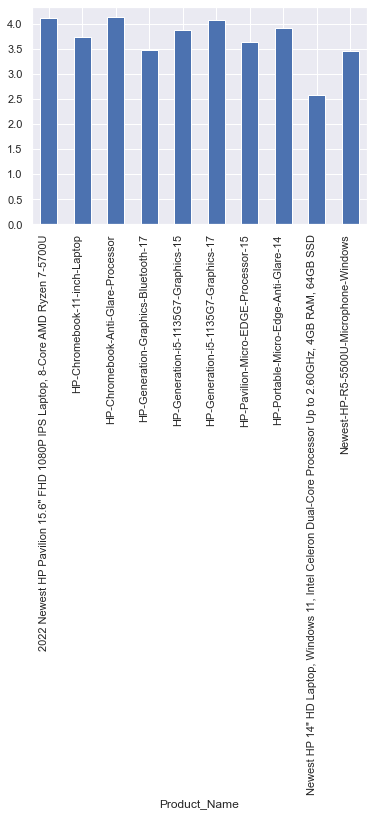

In [238]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
fig=Avg_Rating.plot(kind='bar')
fig.set_xticklabels(Avg_Rating_df['Product_Name'], rotation = 90, ha="right")
plt.show()

In [239]:
Avg_Rating_df

,Product_Name,Stars_out_of_5
0,"2022 Newest HP Pavilion 15.6"" FHD 1080P IPS La...",4.11
1,HP-Chromebook-11-inch-Laptop,3.73
2,HP-Chromebook-Anti-Glare-Processor,4.13
3,HP-Generation-Graphics-Bluetooth-17,3.48
4,HP-Generation-i5-1135G7-Graphics-15,3.87
5,HP-Generation-i5-1135G7-Graphics-17,4.07
6,HP-Pavilion-Micro-EDGE-Processor-15,3.64
7,HP-Portable-Micro-Edge-Anti-Glare-14,3.92
8,"Newest HP 14"" HD Laptop, Windows 11, Intel Cel...",2.58
9,Newest-HP-R5-5500U-Microphone-Windows,3.45


In [288]:
Reviewed_at_df=new_df.Reviewed_at.value_counts().reset_index()

In [300]:
Reviewed_at_df

,Country,Reviewed_at
0,United States,1128
1,Mexico,29
2,Germany,3
3,Australia,1
4,Canada,1


In [299]:
new_Country=[]
for i in Reviewed_at_df.Country:
    new_Country.append(i[:-3])
new_Country
Reviewed_at_df['Country']=new_Country

In [293]:
Reviewed_at_df=Reviewed_at_df.rename(columns={"index": "Country"})

In [305]:
Reviewed_at_df

,Country,Reviewed_at
0,United States,1128
1,Mexico,29
2,Germany,3
3,Australia,1
4,Canada,1


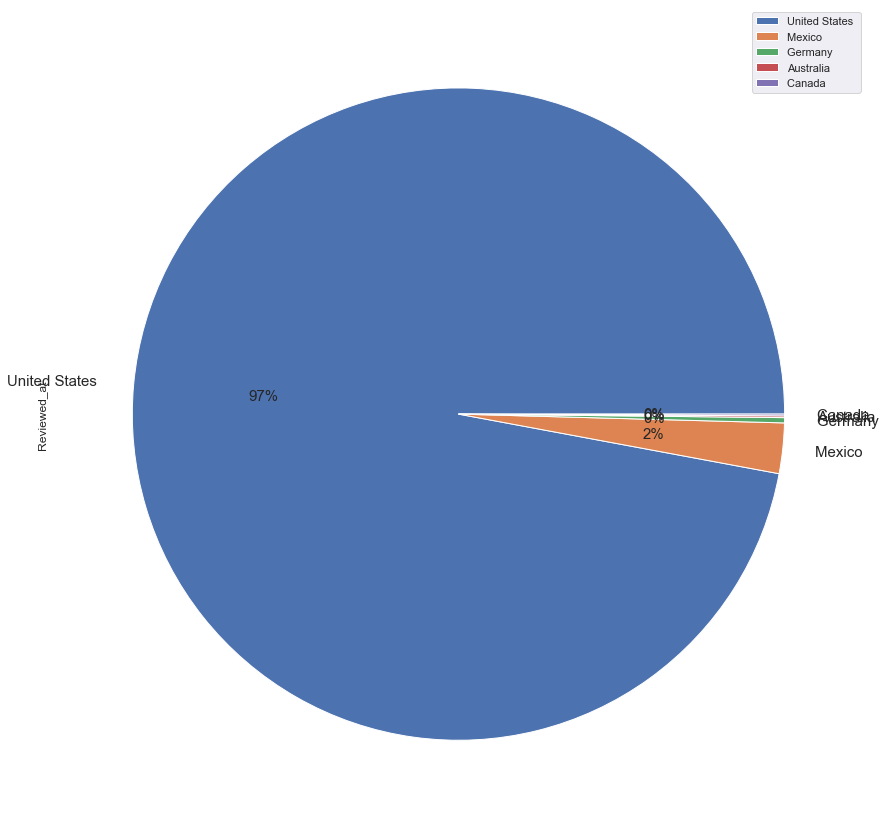

In [304]:
#plt.pie(Reviewed_at_df.Reviewed_at,autopct='%.0f%%',labels=Reviewed_at_df.Country)
index=Reviewed_at_df['Country']
plot = Reviewed_at_df.plot.pie(y='Reviewed_at', figsize=(15, 15),autopct='%.0f%%',fontsize=15, labels=index)

In [309]:
Product_Name_Polarity=new_df.groupby(['Product_Name']).mean().reset_index()

In [310]:
Product_Name_Polarity

,Product_Name,Stars_out_of_5,Polarity
0,"2022 Newest HP Pavilion 15.6"" FHD 1080P IPS La...",4.108108,0.250873
1,HP-Chromebook-11-inch-Laptop,3.732240,0.247861
2,HP-Chromebook-Anti-Glare-Processor,4.131034,0.335691
3,HP-Generation-Graphics-Bluetooth-17,3.476190,0.192668
4,HP-Generation-i5-1135G7-Graphics-15,3.872449,0.241390
5,HP-Generation-i5-1135G7-Graphics-17,4.065934,0.305701
6,HP-Pavilion-Micro-EDGE-Processor-15,3.642857,0.207284
7,HP-Portable-Micro-Edge-Anti-Glare-14,3.921260,0.245452
8,"Newest HP 14"" HD Laptop, Windows 11, Intel Cel...",2.581395,0.102021
9,Newest-HP-R5-5500U-Microphone-Windows,3.445783,0.190720


Text(0, 0.5, 'Pies Consumed')

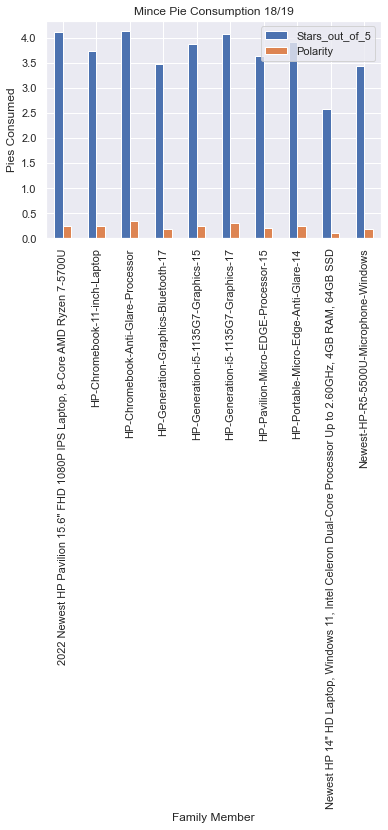

In [311]:
Product_Name_Polarity.plot(
    x="Product_Name", y=["Stars_out_of_5", "Polarity"], kind="bar"
)
plt.title("Mince Pie Consumption 18/19")
plt.xlabel("Family Member")
plt.ylabel("Pies Consumed")

In [ ]:
# Sentimental Analysis can be useful to quickly summarize the quality of text, 
# especially if you have so much text that a human reader cannot analyze it. 
# For this project,the goal is to to classify reviews based on customers text.

In [135]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [138]:
from textblob import TextBlob
polarity=[] # list which will contain the polarity of the comments

for i in df['Review']:
    try:
        polarity.append(TextBlob(i).sentiment.polarity)   
    except:
        polarity.append(0)

In [140]:
df['Polarity']=polarity 

In [141]:
df #If polarity>0, it's a positive review and if it's <0 then, it's negative review

,Reviewer,Review,Product_Name,Reviewed_at,Date_of_Review,Stars_out_of_5,Polarity
0,jackhandy,i do audio work for video games: creating sfx ...,"2022 Newest HP Pavilion 15.6"" FHD 1080P IPS La...",United States,"September 24, 2022",5.0,0.152752
1,Trayson Lancaster,"I've had this laptop for a week now, which has...","2022 Newest HP Pavilion 15.6"" FHD 1080P IPS La...",United States,"November 4, 2022",3.0,0.101718
2,Puck,This is by far the fastest laptop I have ever ...,"2022 Newest HP Pavilion 15.6"" FHD 1080P IPS La...",United States,"September 24, 2022",5.0,0.185908
3,Ovie Joshua,My wife loves it.,"2022 Newest HP Pavilion 15.6"" FHD 1080P IPS La...",United States,"October 28, 2022",5.0,0.000000
4,Ricardo Y Cabral Lopes Dias,It worth,"2022 Newest HP Pavilion 15.6"" FHD 1080P IPS La...",United States,"October 3, 2022",4.0,0.300000
...,...,...,...,...,...,...,...
1157,Enrique Valencia,A very good computer for a very affordable price,HP-Chromebook-Anti-Glare-Processor,Mexico 🇲🇽,"June 27, 2021",5.0,0.555000
1158,María de Lourdes Mejía Camal,I loved,HP-Chromebook-Anti-Glare-Processor,Mexico 🇲🇽,"August 10, 2021",5.0,0.700000
1159,Vanessa Alexia Briones,"Excellent product, good quality, good price",HP-Chromebook-Anti-Glare-Processor,Mexico 🇲🇽,"September 3, 2021",5.0,0.800000
1160,Sthefany,I loved the color and the value for money,HP-Chromebook-Anti-Glare-Processor,Mexico 🇲🇽,"June 14, 2021",5.0,0.700000


In [154]:
Positive_Reviews=df[df['Polarity']>0]

In [155]:
Positive_Reviews

,Reviewer,Review,Product_Name,Reviewed_at,Date_of_Review,Stars_out_of_5,Polarity
0,jackhandy,i do audio work for video games: creating sfx ...,"2022 Newest HP Pavilion 15.6"" FHD 1080P IPS La...",United States,"September 24, 2022",5.0,0.152752
1,Trayson Lancaster,"I've had this laptop for a week now, which has...","2022 Newest HP Pavilion 15.6"" FHD 1080P IPS La...",United States,"November 4, 2022",3.0,0.101718
2,Puck,This is by far the fastest laptop I have ever ...,"2022 Newest HP Pavilion 15.6"" FHD 1080P IPS La...",United States,"September 24, 2022",5.0,0.185908
4,Ricardo Y Cabral Lopes Dias,It worth,"2022 Newest HP Pavilion 15.6"" FHD 1080P IPS La...",United States,"October 3, 2022",4.0,0.300000
5,Anna,"Everything is great, only the color of the key...","2022 Newest HP Pavilion 15.6"" FHD 1080P IPS La...",United States,"September 23, 2022",5.0,0.028125
...,...,...,...,...,...,...,...
1157,Enrique Valencia,A very good computer for a very affordable price,HP-Chromebook-Anti-Glare-Processor,Mexico 🇲🇽,"June 27, 2021",5.0,0.555000
1158,María de Lourdes Mejía Camal,I loved,HP-Chromebook-Anti-Glare-Processor,Mexico 🇲🇽,"August 10, 2021",5.0,0.700000
1159,Vanessa Alexia Briones,"Excellent product, good quality, good price",HP-Chromebook-Anti-Glare-Processor,Mexico 🇲🇽,"September 3, 2021",5.0,0.800000
1160,Sthefany,I loved the color and the value for money,HP-Chromebook-Anti-Glare-Processor,Mexico 🇲🇽,"June 14, 2021",5.0,0.700000


In [152]:
Negative_Reviews=df[df['Polarity']<0]

In [153]:
Negative_Reviews

,Reviewer,Review,Product_Name,Reviewed_at,Date_of_Review,Stars_out_of_5,Polarity
22,Joshua Faryon,It was running smooth for the first month or s...,"2022 Newest HP Pavilion 15.6"" FHD 1080P IPS La...",United States,"July 9, 2022",1.0,-0.041567
33,Ramesh,little expensive,"2022 Newest HP Pavilion 15.6"" FHD 1080P IPS La...",United States,"August 1, 2022",5.0,-0.343750
42,Samantha,Verrrry slow!,"Newest HP 14"" HD Laptop, Windows 11, Intel Cel...",United States,"September 16, 2022",5.0,-0.375000
43,Tanisa Thomas,I would like someone to check out my computer ...,"Newest HP 14"" HD Laptop, Windows 11, Intel Cel...",United States,"July 18, 2022",2.0,-0.300000
44,Marilyn,As soon as I started to get all my information...,"Newest HP 14"" HD Laptop, Windows 11, Intel Cel...",United States,"September 2, 2022",2.0,-0.270370
...,...,...,...,...,...,...,...
1083,Yazmin,"Very bad, it did not help me to make my drawin...",HP-Chromebook-Anti-Glare-Processor,United States,"January 5, 2022",1.0,-0.910000
1086,Teacherlady,I did not know that the Chromebook I purchased...,HP-Chromebook-Anti-Glare-Processor,United States,"March 6, 2021",1.0,-0.131818
1093,Amazon Customer,Don't ever buy a Chromebook it's a waste of mo...,HP-Chromebook-Anti-Glare-Processor,United States,"September 12, 2021",1.0,-0.488281
1098,Luis contreras,Can't use it is very poor quality,HP-Chromebook-Anti-Glare-Processor,United States,"July 9, 2021",1.0,-0.520000


In [157]:
pip install wordcloud

In [158]:
from wordcloud import WordCloud, STOPWORDS
stopwords=set(STOPWORDS)

In [163]:
positive=Positive_Reviews[0:]
total_text= (' '.join(Positive_Reviews['Review']))

In [165]:
len(total_text)

208515

In [166]:
positive

,Reviewer,Review,Product_Name,Reviewed_at,Date_of_Review,Stars_out_of_5,Polarity
0,jackhandy,i do audio work for video games: creating sfx ...,"2022 Newest HP Pavilion 15.6"" FHD 1080P IPS La...",United States,"September 24, 2022",5.0,0.152752
1,Trayson Lancaster,"I've had this laptop for a week now, which has...","2022 Newest HP Pavilion 15.6"" FHD 1080P IPS La...",United States,"November 4, 2022",3.0,0.101718
2,Puck,This is by far the fastest laptop I have ever ...,"2022 Newest HP Pavilion 15.6"" FHD 1080P IPS La...",United States,"September 24, 2022",5.0,0.185908
4,Ricardo Y Cabral Lopes Dias,It worth,"2022 Newest HP Pavilion 15.6"" FHD 1080P IPS La...",United States,"October 3, 2022",4.0,0.300000
5,Anna,"Everything is great, only the color of the key...","2022 Newest HP Pavilion 15.6"" FHD 1080P IPS La...",United States,"September 23, 2022",5.0,0.028125
...,...,...,...,...,...,...,...
1157,Enrique Valencia,A very good computer for a very affordable price,HP-Chromebook-Anti-Glare-Processor,Mexico 🇲🇽,"June 27, 2021",5.0,0.555000
1158,María de Lourdes Mejía Camal,I loved,HP-Chromebook-Anti-Glare-Processor,Mexico 🇲🇽,"August 10, 2021",5.0,0.700000
1159,Vanessa Alexia Briones,"Excellent product, good quality, good price",HP-Chromebook-Anti-Glare-Processor,Mexico 🇲🇽,"September 3, 2021",5.0,0.800000
1160,Sthefany,I loved the color and the value for money,HP-Chromebook-Anti-Glare-Processor,Mexico 🇲🇽,"June 14, 2021",5.0,0.700000


In [167]:
total_text[0:]

'i do audio work for video games: creating sfx in a daw(digital audio workstation) and or composing midi mockup scores using kontakt and a ton of heavy ram use orchestral sample library. the 32g ram on this and the 1tb ssd is a HUGE boon for audio work! i use both ableton and reaper daw. they load super snappy. my kontakt heavy projects load ultra fast now (versus the pc tower i was using, which was still quite powerful).\n\nthe laptop runs fairly quiet even at heavier cpu loads. i composed a piece of music for a game of thrones video game which ran about 60-70% cpu on my other, fastest computer(the pc tower). this hp laptop, it clocks in at a cool 50%. so ive been able to have tons of cpu intense plugins (such as ozone8 or reaktor) running in the daw projects no problem. i was able to turn the cpu down to 0% in the windows power management panel and set the cooling to passive- which causes the laptop to run slower, but basically run silent because less heat generation. which is perfec

In [170]:
import re
total_text=re.sub('[^a-zA-Z]',' ',total_text)

In [171]:
total_text=re.sub(' +',' ',total_text) #removing spaces

In [172]:
total_text

'i do audio work for video games creating sfx in a daw digital audio workstation and or composing midi mockup scores using kontakt and a ton of heavy ram use orchestral sample library the g ram on this and the tb ssd is a HUGE boon for audio work i use both ableton and reaper daw they load super snappy my kontakt heavy projects load ultra fast now versus the pc tower i was using which was still quite powerful the laptop runs fairly quiet even at heavier cpu loads i composed a piece of music for a game of thrones video game which ran about cpu on my other fastest computer the pc tower this hp laptop it clocks in at a cool so ive been able to have tons of cpu intense plugins such as ozone or reaktor running in the daw projects no problem i was able to turn the cpu down to in the windows power management panel and set the cooling to passive which causes the laptop to run slower but basically run silent because less heat generation which is perfect when i need to record foley or my own voi

(-0.5, 999.5, 499.5, -0.5)

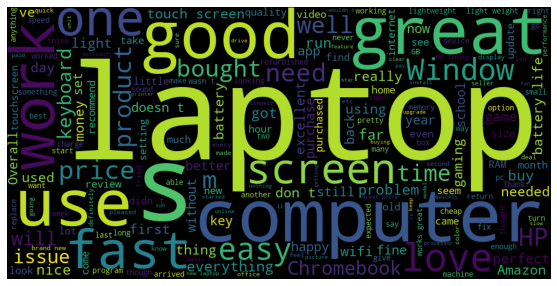

In [174]:
import matplotlib.pyplot as plt
wordcloud = WordCloud(width = 1000, height = 500,stopwords=stopwords).generate(total_text)
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')

In [ ]:
#Some of the positive keywords are fast,battery life, screen time, battery, life, keyboard

In [175]:
negative=Negative_Reviews[0:]
total_negative_text= (' '.join(Negative_Reviews['Review']))

In [176]:
negative

,Reviewer,Review,Product_Name,Reviewed_at,Date_of_Review,Stars_out_of_5,Polarity
22,Joshua Faryon,It was running smooth for the first month or s...,"2022 Newest HP Pavilion 15.6"" FHD 1080P IPS La...",United States,"July 9, 2022",1.0,-0.041567
33,Ramesh,little expensive,"2022 Newest HP Pavilion 15.6"" FHD 1080P IPS La...",United States,"August 1, 2022",5.0,-0.343750
42,Samantha,Verrrry slow!,"Newest HP 14"" HD Laptop, Windows 11, Intel Cel...",United States,"September 16, 2022",5.0,-0.375000
43,Tanisa Thomas,I would like someone to check out my computer ...,"Newest HP 14"" HD Laptop, Windows 11, Intel Cel...",United States,"July 18, 2022",2.0,-0.300000
44,Marilyn,As soon as I started to get all my information...,"Newest HP 14"" HD Laptop, Windows 11, Intel Cel...",United States,"September 2, 2022",2.0,-0.270370
...,...,...,...,...,...,...,...
1083,Yazmin,"Very bad, it did not help me to make my drawin...",HP-Chromebook-Anti-Glare-Processor,United States,"January 5, 2022",1.0,-0.910000
1086,Teacherlady,I did not know that the Chromebook I purchased...,HP-Chromebook-Anti-Glare-Processor,United States,"March 6, 2021",1.0,-0.131818
1093,Amazon Customer,Don't ever buy a Chromebook it's a waste of mo...,HP-Chromebook-Anti-Glare-Processor,United States,"September 12, 2021",1.0,-0.488281
1098,Luis contreras,Can't use it is very poor quality,HP-Chromebook-Anti-Glare-Processor,United States,"July 9, 2021",1.0,-0.520000


In [177]:
total_negative_text

'It was running smooth for the first month or so I had it, and then randomly after booting up a certain steam game it would always randomly turn off the screen and leave the actual computer on. I couldn\'t turn the screen back on I had to restart the whole laptop. It would happen about 3 times per actual game playing session. And then I noticed it was way slower when booting up after not being used for a while. It would sit on desktop and take 3 minutes to open either Spotify, steam, google, or anything. And today it gave me the blue screen of death. I never downloaded anything fishy, just steam games Spotify and then I browsed YouTube every now and then. I remember buying a laptop from bestbuy like 3 years ago for 400$ cad and it was almost as fast as this laptop which is 1400& cad. I mean the laptop worked again after I restarted it a few times, which is good. It still sorta works. But who knows how much worse it will get over time. Might just return it instead of getting a tech guy 

In [178]:
total_negative_text=re.sub(' +',' ',total_negative_text) #removing spaces

In [190]:
total_negative_text                                           

'It was running smooth for the first month or so I had it, and then randomly after booting up a certain steam game it would always randomly turn off the screen and leave the actual computer on. I couldn\'t turn the screen back on I had to restart the whole laptop. It would happen about 3 times per actual game playing session. And then I noticed it was way slower when booting up after not being used for a while. It would sit on desktop and take 3 minutes to open either Spotify, steam, google, or anything. And today it gave me the blue screen of death. I never downloaded anything fishy, just steam games Spotify and then I browsed YouTube every now and then. I remember buying a laptop from bestbuy like 3 years ago for 400$ cad and it was almost as fast as this laptop which is 1400& cad. I mean the laptop worked again after I restarted it a few times, which is good. It still sorta works. But who knows how much worse it will get over time. Might just return it instead of getting a tech guy 

(-0.5, 9999.5, 4999.5, -0.5)

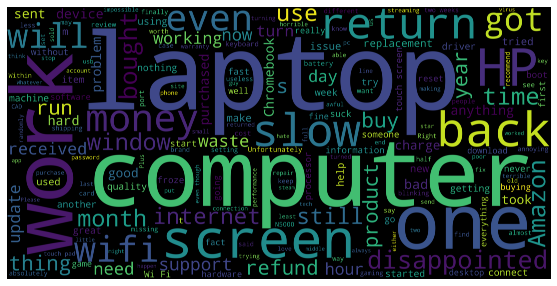

In [194]:
wordcloud = WordCloud(width = 10000, height = 5000,stopwords=stopwords).generate(total_negative_text)
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')

In [ ]:
#Some of the negative keywords most frequently used are :- slow, screen, wifi, update issues, internet